In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stt

import warnings
warnings.filterwarnings('ignore')

In [64]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

In [50]:
train.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


In [51]:
test.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers


## Column Info

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [52]:
train.shape

(8693, 14)

In [53]:
test.shape

(4277, 13)

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [65]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [68]:
train['HomePlanet'].fillna((train['HomePlanet'].mode())[0], inplace = True)
test['HomePlanet'].fillna((test['HomePlanet'].mode())[0], inplace = True)

train['CryoSleep'].fillna(False, inplace = True)
test['CryoSleep'].fillna(False, inplace = True)

train['Cabin'].fillna("Unknown", inplace = True)
test['Cabin'].fillna("Unknown", inplace = True)

train['Age'].fillna((train['Age'].mean()), inplace = True)
test['Age'].fillna((test['Age'].mean()), inplace = True)

train['VIP'].fillna(False, inplace = True)
test['VIP'].fillna(False, inplace = True)

train['RoomService'].fillna(0.0, inplace = True)
test['RoomService'].fillna(0.0, inplace = True)

train['FoodCourt'].fillna(0.0, inplace = True)
test['FoodCourt'].fillna(0.0, inplace = True)

train['ShoppingMall'].fillna(0.0, inplace = True)
test['ShoppingMall'].fillna(0.0, inplace = True)

train['Spa'].fillna(0.0, inplace = True)
test['Spa'].fillna(0.0, inplace = True)

train['VRDeck'].fillna(0.0, inplace = True)
test['VRDeck'].fillna(0.0, inplace = True)

train['Name'].fillna("Unknown", inplace = True)
test['Name'].fillna("Unknown", inplace = True)

#Destination
train.dropna(inplace = True)
test.dropna(inplace = True)

train = train.reset_index()
test = test.reset_index()

In [69]:
train['Transported'] = train['Transported'].astype(int)

train['VIP'] = train['VIP'].astype(int)
train['CryoSleep'] = train['CryoSleep'].astype(int)
test['VIP'] = test['VIP'].astype(int)
test['CryoSleep'] = test['CryoSleep'].astype(int)

In [74]:
train[['Deck', 'Cabin_Number', 'Side']] = train['Cabin'].str.split("/" , expand=True)
test[['Deck', 'Cabin_Number', 'Side']] = test['Cabin'].str.split("/" , expand=True)
train = train.drop('Cabin', axis = 1)
test = test.drop('Cabin' , axis = 1)


In [75]:
train.head()

,index,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_Number,Side
0,0,0001_01,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,P
1,1,0002_01,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S
2,2,0003_01,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,S
3,3,0003_02,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,S
4,4,0004_01,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S


In [25]:
quantitative_ftrs = list(train.describe().columns)
qualitative_ftrs = [ele for ele in (train.columns) if ele not in quantitative_ftrs]
print(f"Quantitative : {quantitative_ftrs}")
print(f"Qualitative : {qualitative_ftrs}")

Quantitative : ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
Qualitative : ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Transported']


In [28]:
qual_meansures = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']

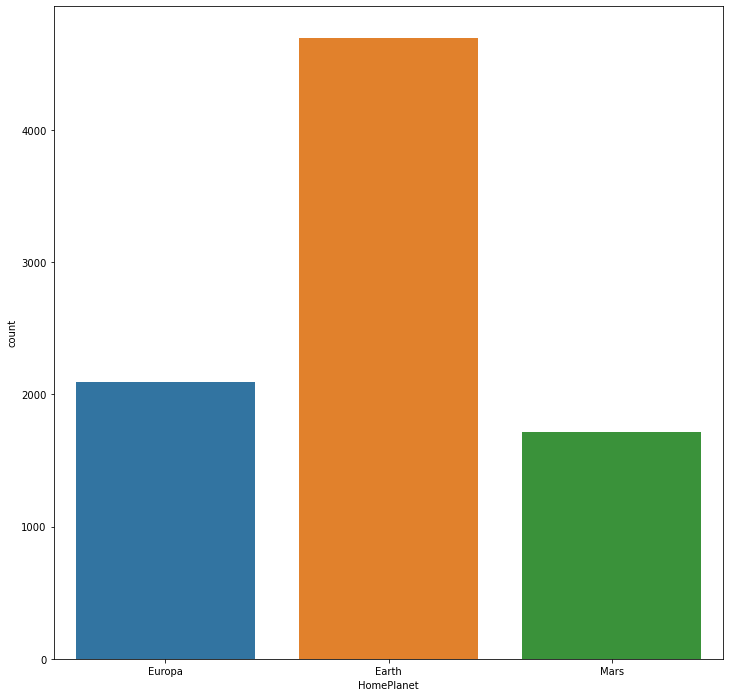

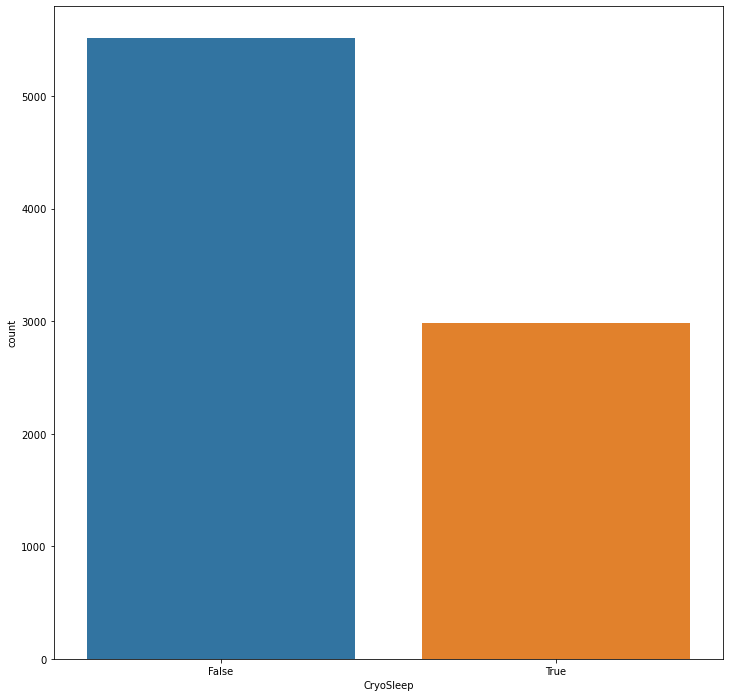

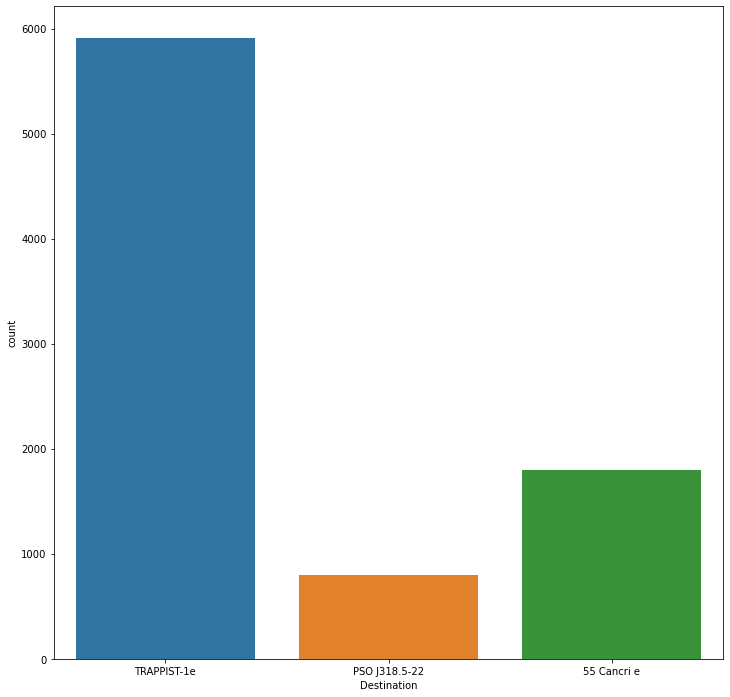

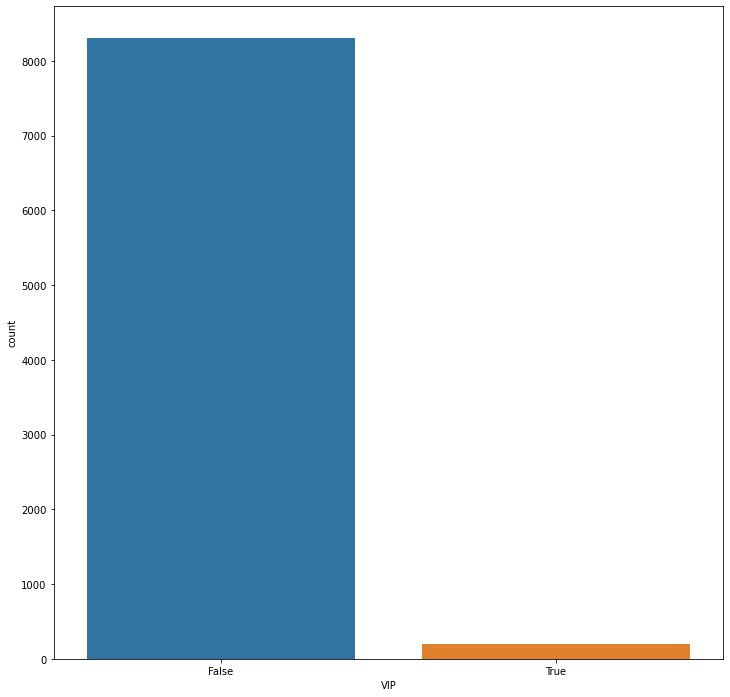

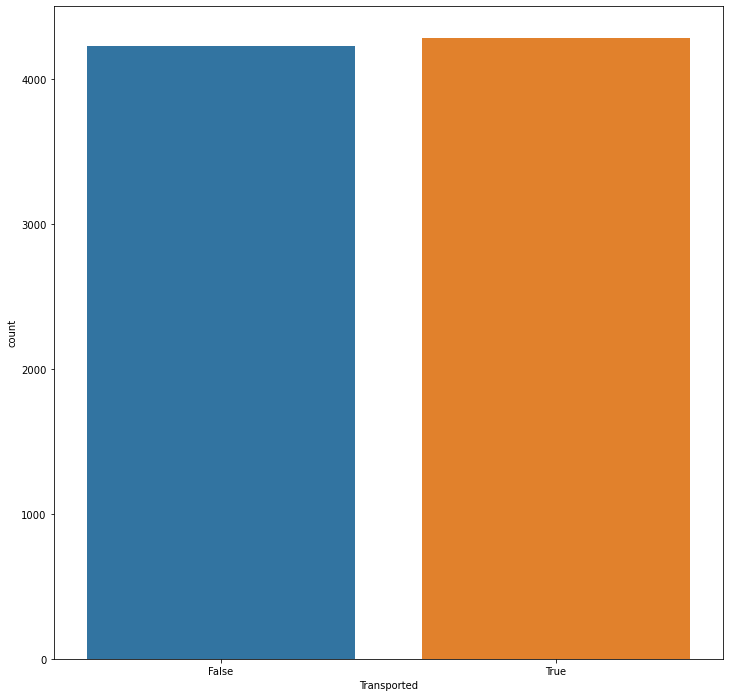

In [29]:
for col in qual_meansures:
    plt.figure(figsize=(12, 12))
    sns.countplot(x = col, data = train)
    plt.show

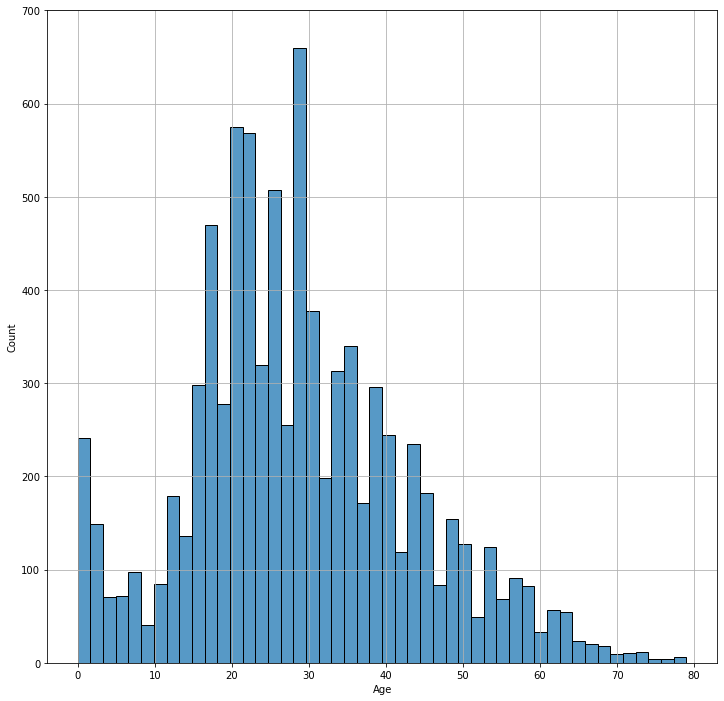

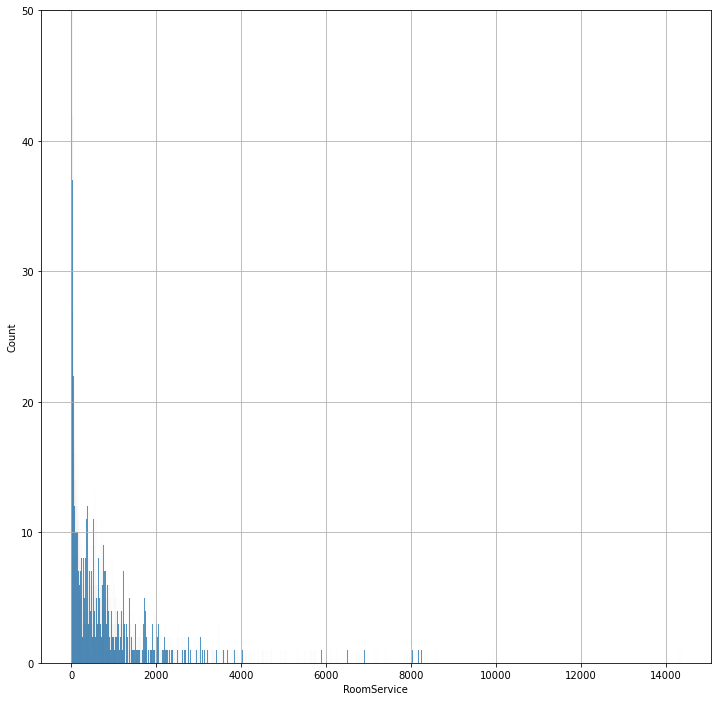

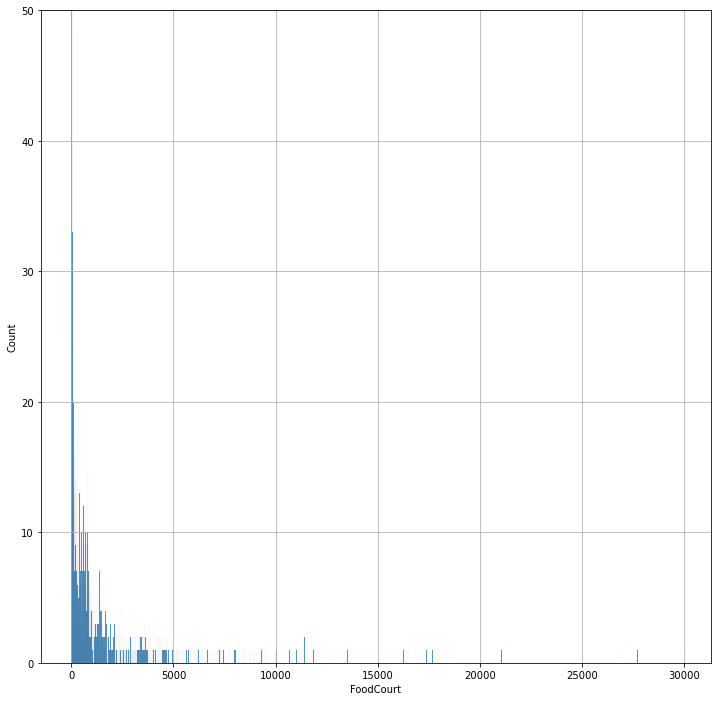

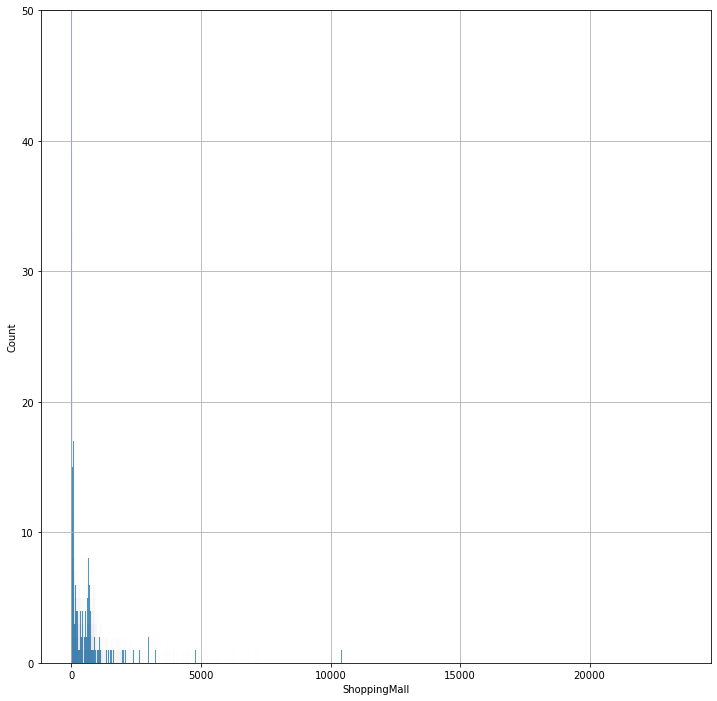

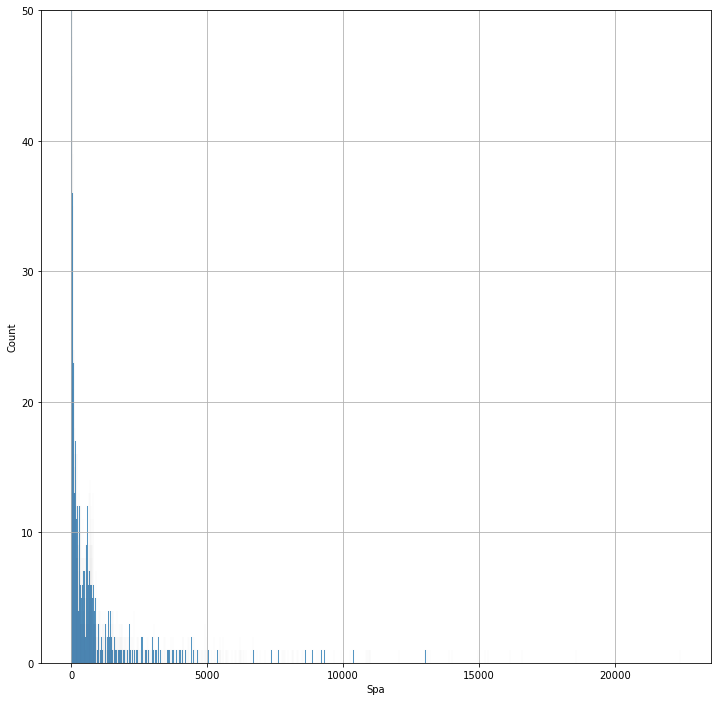

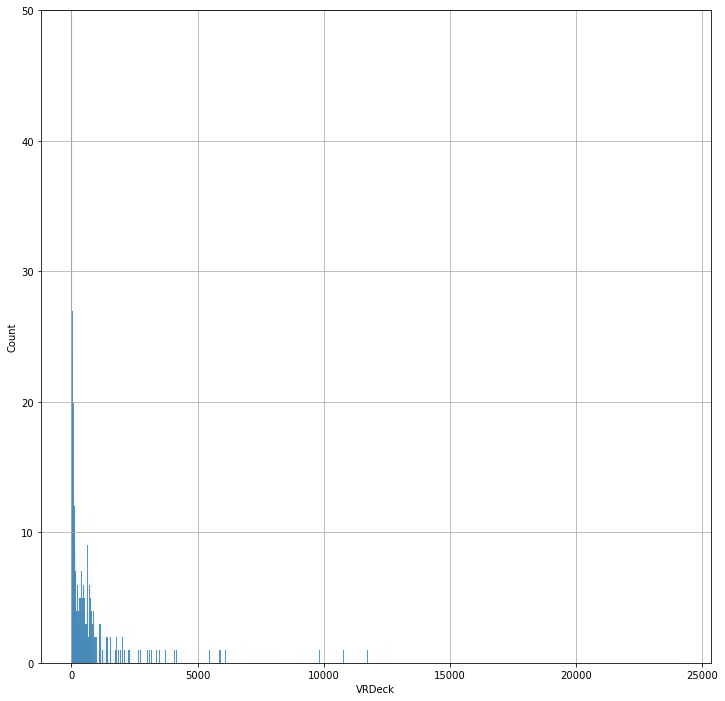

In [36]:
for col in quantitative_ftrs:
    if col != 'Age':
        plt.figure(figsize=(12, 12))
        sns.histplot(train[col])
        plt.ylim(0, 50)
    else: 
        plt.figure(figsize=(12, 12))
        sns.histplot(train[col])
        plt.ylim(0, 700)
    plt.grid()
    plt.show